## Load Image

In [26]:
import os
import cv2

dataset_dir = 'big_dataset'

images = []
labels = []

for label_name in os.listdir(dataset_dir):
    label_path = os.path.join(dataset_dir, label_name)
    for filename in os.listdir(label_path):
        image_path = os.path.join(label_path, filename)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (128, 128))
        images.append(image)
        labels.append(label_name)

print("load image done\n")

load image done



## Feature(HOG)

In [16]:
import cv2
from skimage.feature import hog

features = []
for image in images:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (128, 128))
    feature, _ = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
    features.append(feature)

## Feature(edge)

In [29]:
import cv2
import numpy as np

features = []
for image in images:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (128, 128))
    edges = cv2.Canny(gray, threshold1=100, threshold2=200)
    feature = edges.flatten()  # 攤平成一維向量
    features.append(feature)


## Dataset

In [30]:
from sklearn.model_selection import train_test_split

feature_train_val, feature_test, labels_train_val, labels_test = train_test_split(features,labels,test_size=0.20)

## Train

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

model_ovr = GridSearchCV(SVC(kernel='linear', decision_function_shape='ovr'), param_grid, cv=4)
model_ovr.fit(feature_train_val, labels_train_val)

print("Best parameters:", model_ovr.best_params_)
print("Best cross-validation score:", model_ovr.best_score_)

Best parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Best cross-validation score: 0.58203125


## Test

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# y_pred = model_ovo.predict(feature_test)
# print("One VS One Accuracy:", accuracy_score(labels_test, y_pred))

y_pred = model_ovr.predict(feature_test)
print("One VS All Accuracy:", accuracy_score(labels_test, y_pred))

One VS All Accuracy: 0.65625


## Confusion Matrix

[[13  0  3  0]
 [ 1 10  3  3]
 [ 0  2  9  0]
 [ 1  7  2 10]]


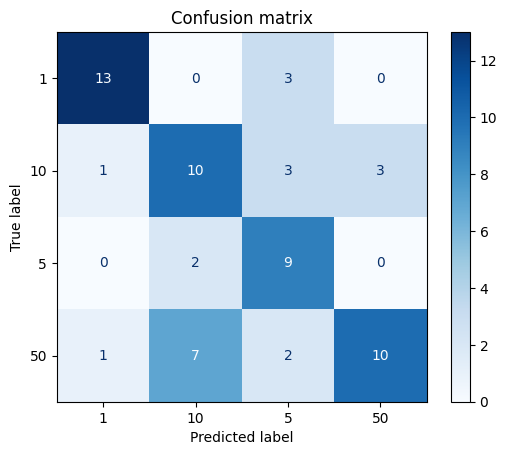

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
        model_ovr,
        feature_test,
        labels_test,
        cmap=plt.cm.Blues,
        normalize=None,
    )
disp.ax_.set_title("Confusion matrix")

print(disp.confusion_matrix)

#plt.show()